# 1. Clase Animation
---

Esta clase define un entorno de animación preparado para ejecutar cada una de las animaciones de transformación (Traslación, Escalado y Rotación)

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.animation import FuncAnimation

class Animation:
    def __init__(self, xlim=(0, 10), ylim=(0, 10), frames=30, interval=1000, gif_filename='animation.gif', 
                 update_callback=None, title=None, info_text=None):
        self.xlim = xlim
        self.ylim = ylim
        self.frames = frames
        self.interval = interval
        self.gif_filename = gif_filename
        self.update_callback = update_callback  # Callback para generar puntos
        self.title = title  # Título de la animación
        self.info_text = info_text  # Texto informativo

        # Crear figura y eje
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(*self.xlim)
        self.ax.set_ylim(*self.ylim)

        # Agregar título si se proporciona
        if self.title:
            self.ax.set_title(self.title)

        # Inicializar puntos
        self.points, = self.ax.plot([], [], 'bo-')  # 'bo' para puntos azules

        # Agregar texto informativo si se proporciona
        if self.info_text:
            self.text = self.ax.text(0.5, -0.1, self.info_text, ha='center', va='center', transform=self.ax.transAxes)
        else:
            self.text = None

    def init(self):
        """Función para inicializar la animación."""
        self.points.set_data([], [])
        return self.points,

    def update(self, frame):
        """Función para actualizar los datos en cada cuadro."""
        x, y = self.update_callback(frame, self.xlim, self.ylim)
        self.points.set_data(x, y)
        return self.points,

    def create_animation(self):
        """Crear la animación."""
        self.ani = FuncAnimation(
            self.fig, self.update, init_func=self.init,
            frames=self.frames, interval=self.interval, blit=True
        )

    def save_animation(self):
        """Guardar la animación como un GIF."""
        self.ani.save(self.gif_filename, writer='pillow')

    def render_gif(self):
        """Renderizar el GIF en el notebook."""
        return Image(filename=self.gif_filename)

# 2. Animaciones

## 2.1 Animación de traslación

$$
\begin{bmatrix}
1 & 0 & tx \\
0 & 1 & ty \\
0 & 0 & 1 \\
 
\end{bmatrix}

*

\begin{bmatrix}
x \\
y \\
1 \\
 
\end{bmatrix}

=

\begin{bmatrix}
x + tx \\
y + ty \\
1 \\
 
\end{bmatrix}

$$


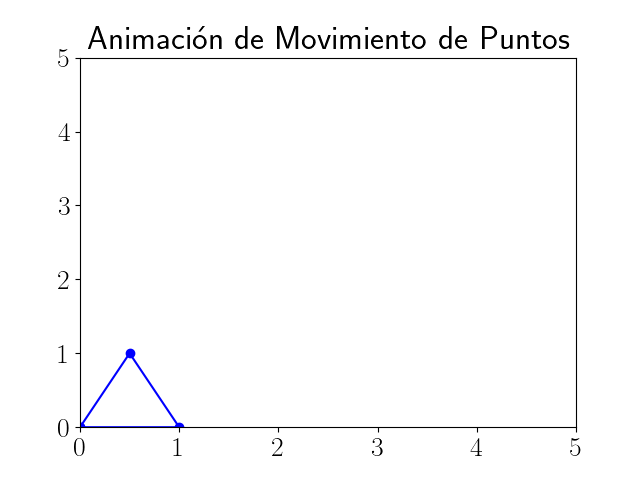

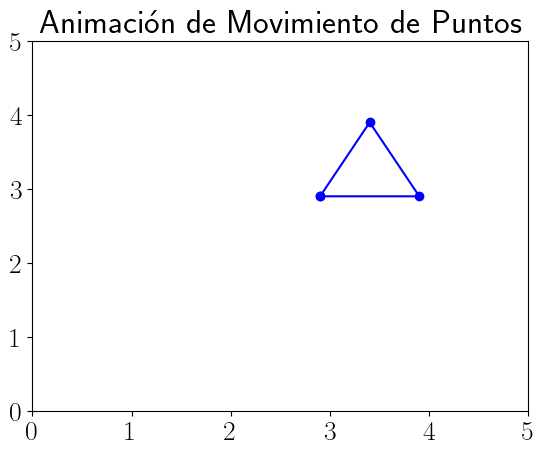

In [160]:
def MOVE_POINTS_ANIMATION(frame, xlim, ylim):
    points = np.array([[0, 0], [1, 0], [0.5, 1], [0, 0]])  # Triángulo inicial

    # Factores de traslación
    tx, ty = 0.1, 0.1  # Incremento del 10% por frame
    MATRIZ_TRASLACION = np.array([
        [1, 0, tx * frame],  
        [0, 1, ty * frame], 
        [0, 0, 1         ]
    ])

    # Aplicar la traslación a los puntos
    traslated_points = []
    for point in points:
        point_homogeneo = np.append(point, 1)  
        point_trasladado = MATRIZ_TRASLACION @ point_homogeneo
        traslated_points.append(point_trasladado[:2]) 

    traslated_points = np.array(traslated_points)
    return traslated_points[:, 0], traslated_points[:, 1]  
    

    
animation = Animation(
    xlim=(0, 5), ylim=(0, 5), frames=30, interval=100, gif_filename='move_animation.gif',
    update_callback=MOVE_POINTS_ANIMATION,  # Callback para generar puntos en movimiento
    title="Animación de Movimiento de Puntos",  # Título de la animación
)

animation.create_animation()
animation.save_animation()
animation.render_gif()

## 2.2 Animación de escalado

$$
\begin{bmatrix}
sx & 0 & 0 \\
0 & sy & 0 \\
0 & 0 & 1 \\
 
\end{bmatrix}

*

\begin{bmatrix}
x \\
y \\
1 \\
 
\end{bmatrix}

=

\begin{bmatrix}
x * sx \\
y * sy \\
1 \\
 
\end{bmatrix}

$$

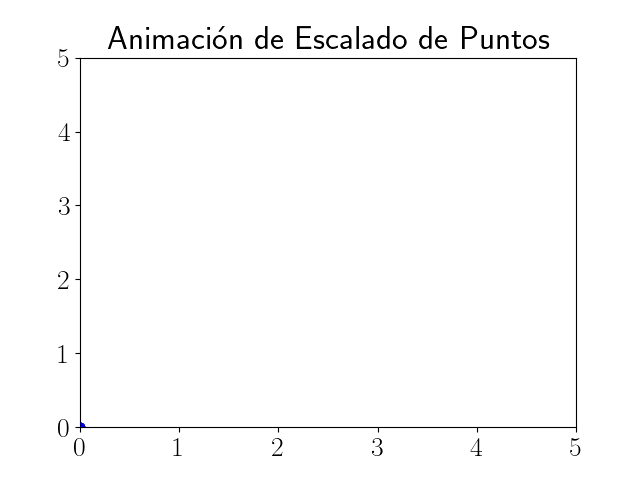

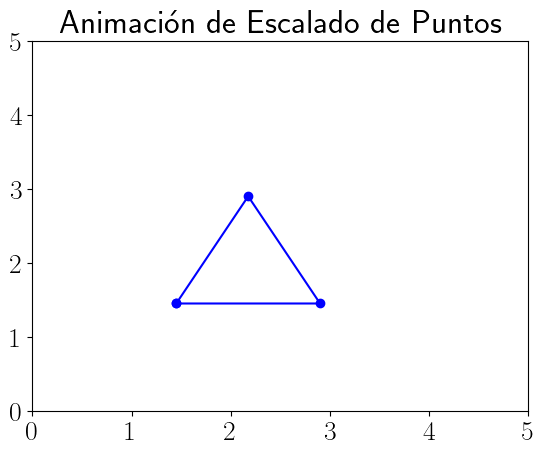

In [162]:
def SCALE_POINTS_ANIMATION(frame, xlim, ylim):
    points = np.array([[1, 1], [2, 1], [1.5, 2], [1, 1]])  # Triángulo inicial

    # Factores de escalado
    sx, sy = 0.05, 0.05 # Incremento del 5% por frame
    MATRIZ_ESCALADO = np.array([
        [sx * frame, 0, 0],
        [0, sy * frame, 0], 
        [0, 0, 1]
    ])

    # Aplicar la traslación a los puntos
    scaled_points = []
    for point in points:
        point_homogeneo = np.append(point, 1)  
        point_escalado = MATRIZ_ESCALADO @ point_homogeneo
        scaled_points.append(point_escalado[:2]) 

    scaled_points = np.array(scaled_points)
    return scaled_points[:, 0], scaled_points[:, 1]  
    
animation = Animation(
    xlim=(0, 5), ylim=(0, 5), frames=30, interval=100, gif_filename='scale_animation.gif',
    update_callback=SCALE_POINTS_ANIMATION,  # Callback para generar puntos en movimiento
    title="Animación de Escalado de Puntos",  # Título de la animación
)

animation.create_animation()
animation.save_animation()
animation.render_gif()

## 2.3 Animación de rotación

$$
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 \\
 
\end{bmatrix}

*

\begin{bmatrix}
x \\
y \\
1 \\
 
\end{bmatrix}

=

\begin{bmatrix}
x\cos(\theta) - y\sin(\theta) \\
x\sin(\theta) + y\cos(\theta) \\
1 \\
 
\end{bmatrix}

$$

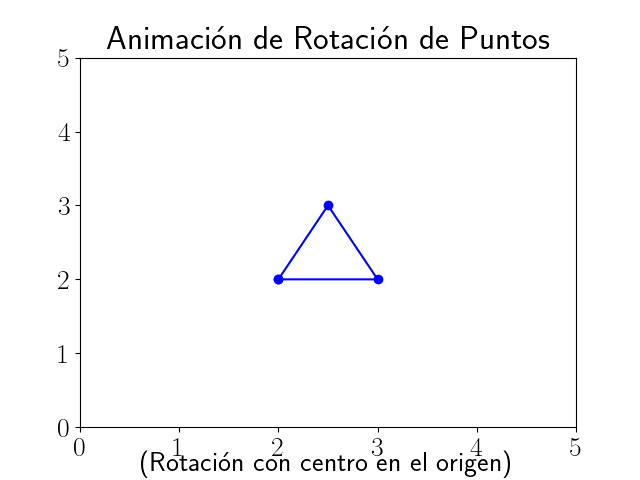

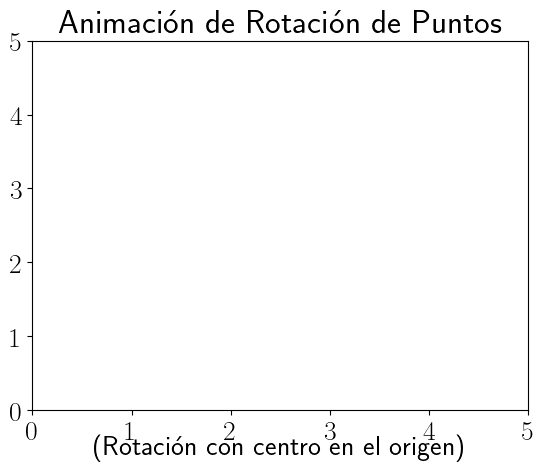

In [175]:
from math import cos, sin

def ROTATE_POINTS_ANIMATION(frame, xlim, ylim):
    points = np.array([[2, 2], [3, 2], [2.5, 3], [2, 2]])  # Triángulo inicial

    # Factores de escalado
    theta = np.radians(15)  # 15 grados por frame
    MATRIZ_ROTACION = np.array([
        [cos(theta * frame), -sin(theta * frame) , 0],
        [sin(theta * frame), cos(theta * frame) , 0], 
        [0, 0, 1]
    ])

    # Aplicar la traslación a los puntos
    scaled_points = []
    for point in points:
        point_homogeneo = np.append(point, 1)  
        point_escalado = MATRIZ_ROTACION @ point_homogeneo
        scaled_points.append(point_escalado[:2]) 

    scaled_points = np.array(scaled_points)
    return scaled_points[:, 0], scaled_points[:, 1]  
    
animation = Animation(
    xlim=(0, 5), ylim=(0, 5), frames=30, interval=100, gif_filename='rotate_animation.gif',
    update_callback=ROTATE_POINTS_ANIMATION,  # Callback para generar puntos en movimiento
    title="Animación de Rotación de Puntos",  # Título de la animación
    info_text="(Rotación con centro en el origen)"  # Texto informativo
)

animation.create_animation()
animation.save_animation()
animation.render_gif()